
# **Project Objective** 



**Practical Assignment**
**Objective:** - Image Classification with CIFAR 100

This dataset is just like the CIFAR-10, except it has 100 classes containing 600
images each. There are 500 training images and 100 testing images per class.
The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image
comes with a &quot;fine&quot; label (the class to which it belongs) and a &quot;coarse&quot; label
(the superclass to which it belongs).

**Dataset Link:** - https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
The dataset is not direct images. Please decode it using your own techniques.

**Task:** - Create a Web Application using Flask. Use the end user should be able
to upload an image and get results with the prediction score.

**Deployment:** - Any Free Platform(Try to look out for free options.)

**Assignment Submission:** - Only submit the hosted app link.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Collection**

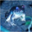

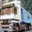

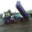

-1

In [2]:
import pickle
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_dir = '/content/drive/MyDrive/DL/Assignment1/cifar-10-batches-py/'

# Load training data
train_images = []
train_labels = []
for i in range(1, 6):
    filename = data_dir + f'data_batch_{i}'
    batch = unpickle(filename)
    batch_images = batch[b'data'].reshape((-1, 3, 32, 32)).transpose((0, 2, 3, 1))
    train_images.append(batch_images)
    train_labels += batch[b'labels']
train_images = np.concatenate(train_images, axis=0)
train_labels = np.array(train_labels)

# Load test data
test_batch = unpickle(data_dir + 'test_batch')
test_images = test_batch[b'data'].reshape((-1, 3, 32, 32)).transpose((0, 2, 3, 1))
test_labels = np.array(test_batch[b'labels'])

# Visualize some images
for i in range(3):
    img = train_images[i]
    label = train_labels[i]
    cv2_imshow(img)   #(f'Image {i}, Label {label}', img)
cv2.waitKey(0)


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_images[11].shape

(32, 32, 3)

In [5]:
train_images[11]

array([[[142, 149, 152],
        [172, 172, 167],
        [176, 168, 154],
        ...,
        [216, 212, 211],
        [198, 194, 193],
        [205, 202, 200]],

       [[191, 190, 192],
        [196, 192, 190],
        [174, 166, 159],
        ...,
        [229, 222, 220],
        [222, 215, 213],
        [217, 210, 207]],

       [[220, 212, 212],
        [217, 209, 208],
        [192, 183, 182],
        ...,
        [224, 214, 209],
        [225, 214, 210],
        [218, 208, 203]],

       ...,

       [[197, 152, 136],
        [196, 152, 135],
        [201, 156, 140],
        ...,
        [200, 165, 146],
        [199, 165, 146],
        [205, 164, 150]],

       [[196, 157, 139],
        [191, 152, 135],
        [193, 154, 136],
        ...,
        [198, 164, 144],
        [199, 165, 145],
        [201, 161, 146]],

       [[186, 150, 133],
        [182, 147, 130],
        [174, 139, 121],
        ...,
        [158, 124, 105],
        [158, 125, 106],
        [163, 125, 111]]

# **Data Preparation**


In [ ]:
# Normalize the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# **Model Training**

## Experiment 1


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Model Architecture
# Define the model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen_train = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)
datagen_train.fit(train_images)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(datagen_train.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) / 64, epochs=50, verbose=1,
                    validation_data=(test_images, test_labels), callbacks=[early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)


Epoch 1/50
781/781 [==============================] - 104s 111ms/step - loss: 3.9675 - accuracy: 0.0980 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 2/50
781/781 [==============================] - 86s 110ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3025 - val_accuracy: 0.1001
Epoch 3/50
781/781 [==============================] - 83s 106ms/step - loss: 2.3038 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1012
Epoch 4/50
781/781 [==============================] - 81s 104ms/step - loss: 2.3031 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
781/781 [==============================] - 82s 104ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
781/781 [==============================] - 80s 103ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
313/313 - 4s - loss: 2.3026 - accuracy: 0.1000 - 4s/epoch - 14ms/step
Test accuracy: 0.10000000149011612


## Experiment 2

ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Resize images to match input size of ResNet50
def resize_image(img):
    return img.resize((224, 224))


# Resize images
x_train_resized = [resize_image(Image.fromarray(img)) for img in train_images]
x_test_resized = [resize_image(Image.fromarray(img)) for img in test_images]

# Convert resized images to numpy array
x_train_resized = tf.keras.preprocessing.image.img_to_array(x_train_resized)
x_test_resized = tf.keras.preprocessing.image.img_to_array(x_test_resized)

# Preprocess data
x_train_resized = tf.keras.applications.resnet50.preprocess_input(x_train_resized)
x_test_resized = tf.keras.applications.resnet50.preprocess_input(x_test_resized)
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

# Load pre-trained ResNet50 model
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train_resized, y_train, batch_size=32, epochs=10, validation_data=(x_test_resized, y_test))


## Experiment 3
VGG16

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Normalize the input images
x_train = train_images / 255.0
x_test = test_images / 255.0

y_train = train_labels
y_test = test_labels
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the weights in the base model
for layer in base_model.layers:
    layer.trainable = False


# Add a new top layer for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 16s 15ms/step - loss: 1.3661 - accuracy: 0.5246 - val_loss: 1.2832 - val_accuracy: 0.5478
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.1810 - accuracy: 0.5886 - val_loss: 1.1880 - val_accuracy: 0.5868
Epoch 3/10
782/782 [==============================] - 12s 16ms/step - loss: 1.1207 - accuracy: 0.6092 - val_loss: 1.1629 - val_accuracy: 0.5900
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0721 - accuracy: 0.6249 - val_loss: 1.1491 - val_accuracy: 0.6025
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0358 - accuracy: 0.6363 - val_loss: 1.1151 - val_accuracy: 0.6095
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9990 - accuracy: 0.6504 - val_loss: 1.1263 - val_accuracy: 0.6044
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9673 - accuracy: 0.6621 - val_loss: 1.1146 - val_accuracy:

In [8]:
# save the model
model.save("/content/drive/MyDrive/DL/Assignment1/Saved_models/VGG16_model.h5")

### Hyperparameter Tuning

In [6]:
from keras.applications.vgg16 import VGG16
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam




# Normalize the input images
X_train = train_images / 255.0
X_test = test_images / 255.0

y_train = train_labels
y_test = test_labels
# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the VGG16 model
def create_model(optimizer='adam', learning_rate=0.001):
    model = VGG16(include_top=False, input_shape=(32,32, 3))
    for layer in model.layers:
        layer.trainable = False
    flat_layer = Flatten()(model.layers[-1].output)
    class_layer = Dense(128, activation='relu')(flat_layer)
    output_layer = Dense(10, activation='softmax')(class_layer)
    final_model = Model(inputs=model.inputs, outputs=output_layer)
    final_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return final_model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {'optimizer': ['adam', 'rmsprop'],
              'learning_rate': [0.001, 0.01, 0.1]}

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model
best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)
score = best_model.score(X_test, y_test)
print("Test score:", score)

<ipython-input-6-67c605529446>:37: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.557320 using {'learning_rate': 0.001, 'optimizer': 'adam'}
Test score: 0.5658000111579895


## Experiment 4
Inception V3

In [9]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Load the CIFAR-10 dataset
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the input data
X_train = preprocess_input(train_images)
X_test = preprocess_input(test_images)
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)


# Resize the images to 75x75
X_train_resized = tf.image.resize(X_train, [75, 75])
X_test_resized = tf.image.resize(X_test, [75, 75])

# Create the pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)

# Add a final softmax layer for classification
predictions = Dense(10, activation='softmax')(x)

# Combine the base model and the new layers to create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Train the model using the augmented data
history = model.fit(
    datagen.flow(X_train_resized, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    epochs=10,
    validation_data=(X_test_resized, y_test)
)

# Evaluate the model on the test data
score = model.evaluate(X_test_resized, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
1562/1562 [==============================] - 113s 68ms/step - loss: 1.2890 - accuracy: 0.5467 - val_loss: 1.1252 - val_accuracy: 0.6021
Epoch 2/10
1562/1562 [==============================] - 106s 68ms/step - loss: 1.1586 - accuracy: 0.5914 - val_loss: 1.0643 - val_accuracy: 0.6241
Epoch 3/10
1562/1562 [==============================] - 104s 66ms/step - loss: 1.1228 - accuracy: 0.6018 - val_loss: 1.0438 - val_accuracy: 0.6314
Epoch 4/10
1562/1562 [==============================] - 107s 69ms/step - loss: 1.0952 - accuracy: 0.6102 - val_loss: 1.0194 - val_accuracy: 0.6438
Epoch 5/10
1562/1562 [==============================] - 103s 66ms/step - loss: 1.0869 - accuracy: 0.6169 - val_loss: 1.0075 - val_accuracy: 0.6467
Epoch 6/10
1562/1562 [==============================] - 103s 66ms/step - loss: 1.0660 - accuracy: 0.6244 - val_loss: 1.0065 - val_accuracy: 0.6466
Epoch 7/10
1562/1562 [==============================] - 105s 67ms/step - loss: 1.0571 - accuracy: 0.6272 - val_loss: 1

In [10]:
# save model
model.save("/content/drive/MyDrive/DL/Assignment1/Saved_models/inceptionV3_model.h5")

# **Prediction**


In [5]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Load saved model
model = load_model('Saved_models/inceptionV3_model.h5')

# Load test image
image_path = 'ship8.png'
image = load_img(image_path, target_size=(75,75))
image = img_to_array(image)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)

# Make prediction
predictions = model.predict(image)

1/1 [==============================] - 1s 1s/step


In [6]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

# Get predicted class and probability
class_idx = np.argmax(predictions)
class_label = cifar10_classes[class_idx]
probability = predictions[0][class_idx]

# Print results
print(f'Predicted class: {class_label}')
print(f'Probability: {probability}')

Predicted class: ship
Probability: 0.992682158946991
